In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


Importing Dataset from Drive

In [10]:
data = pd.read_csv('/content/sample_data/Apple Dataset.csv')

In [ ]:
data.head(11000)

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.099058,469033600
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.093890,175884800
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.086999,105728000
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089152,86441600
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.091737,73449600
...,...,...,...,...,...,...,...
10949,2024-05-20,189.330002,191.919998,189.009995,191.039993,191.039993,44361300
10950,2024-05-21,191.089996,192.729996,190.919998,192.350006,192.350006,42309400
10951,2024-05-22,192.270004,192.820007,190.270004,190.899994,190.899994,34648500
10952,2024-05-23,190.979996,191.000000,186.630005,186.880005,186.880005,51005900


Printing information about dataframe

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10954 entries, 0 to 10953
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       10954 non-null  object 
 1   Open       10954 non-null  float64
 2   High       10954 non-null  float64
 3   Low        10954 non-null  float64
 4   Close      10954 non-null  float64
 5   Adj Close  10954 non-null  float64
 6   Volume     10954 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 599.2+ KB


Convert to Pandas DateTime object

In [12]:
data['Date'] = pd.to_datetime(data['Date'])
data = data.set_index('Date')

In [13]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,10954.000000,10954.000000,10954.000000,10954.000000,10954.000000,1.095400e+04
mean,21.530877,21.761904,21.308220,21.544072,20.747506,3.190792e+08
std,44.458386,44.931856,44.013578,44.492483,44.038943,3.357446e+08
min,0.049665,0.049665,0.049107,0.049107,0.037900,0.000000e+00
25%,0.296875,0.303571,0.290179,0.296875,0.241624,1.139936e+08
50%,0.522321,0.533482,0.513393,0.524554,0.427333,2.067128e+08
75%,19.767500,19.888572,19.457768,19.682679,17.048054,3.993444e+08
max,198.020004,199.619995,197.000000,198.110001,197.589523,7.421641e+09


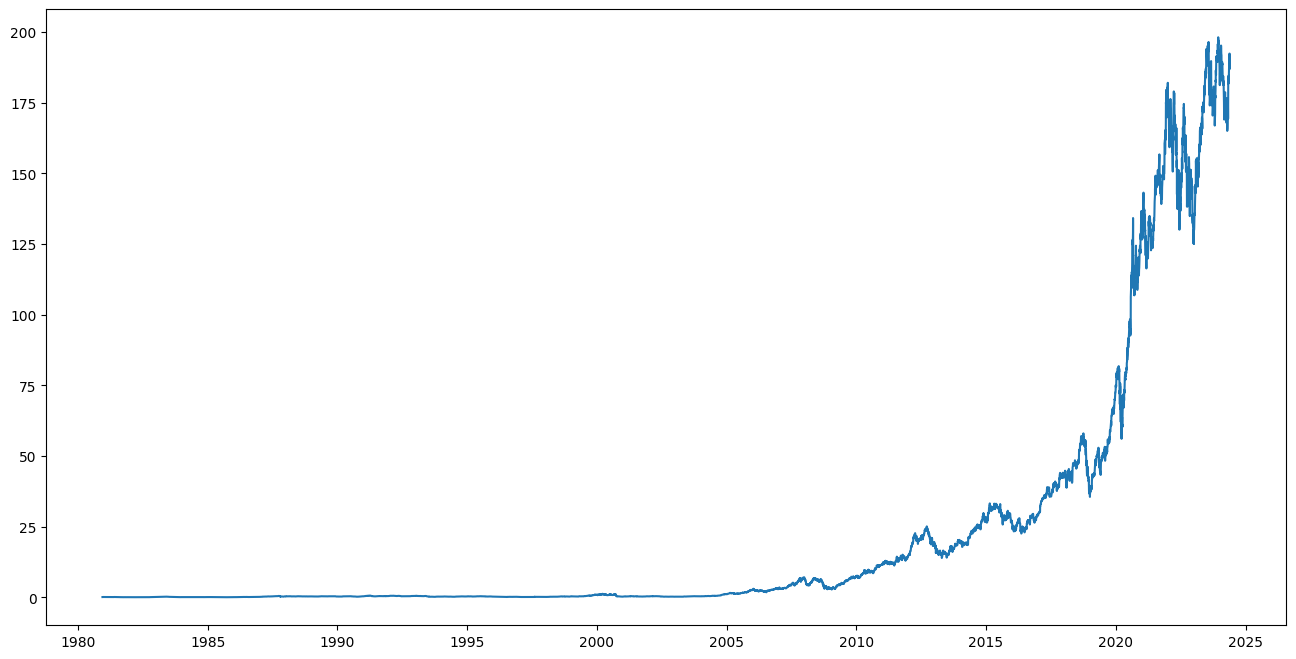

In [14]:
plt.figure(figsize=(16,8))
plt.plot(data['Close'],  label='Closing Price')

Classification Problem: buy(+1) or sell(-1) the stock

In [15]:
data['Open - Close'] = data['Open'] - data['Close']
data['High - Low'] = data['High'] - data['Low']
data = data.dropna()

Input features to predict whether you should buy or sell stock

In [16]:
X = data[['Open - Close','High - Low']]
X.head(11000)

,Open - Close,High - Low
Date,,
1980-12-12,0.000000,0.000558
1980-12-15,0.000558,0.000558
1980-12-16,0.000558,0.000558
1980-12-17,0.000000,0.000558
1980-12-18,0.000000,0.000558
...,...,...
2024-05-20,-1.709991,2.910003
2024-05-21,-1.260010,1.809998
2024-05-22,1.370010,2.550003


Intention is to store +1 for BUY and -1 for SELL. The target variable is "Y" for classification

In [17]:
Y= np.where(data['Close'].shift(-1)>data['Close'],1,-1)

In [18]:
Y

array([-1, -1,  1, ..., -1,  1, -1])

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.25,random_state = 44)

Implementation of KNN Classifier

In [20]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

#using gridsearch to find the best parameter
params = {'n_neighbors':[2,3,4,5,6,7,8,9,10,11,12,13,14,15]}
knn= neighbors.KNeighborsClassifier()
model = GridSearchCV(knn, params, cv=5)

#fit the model
model.fit(X_train, y_train)

#Accuracy Score
accuracy_train = float(accuracy_score(y_train, model.predict(X_train)))
accuracy_test = float(accuracy_score(y_test, model.predict(X_test)))

trainperct = accuracy_train * 100;
testperct = accuracy_test * 100;

print('Train_data Accuracy: %.2f%%' %trainperct)
print('Test_data Accuracy: %.2f%%' %testperct)

Train_data Accuracy: 60.30%
Test_data Accuracy: 50.38%


In [21]:
actual_predicted_data = pd.DataFrame({'Actual': y_test, 'Predicted': model.predict(X_test)})

In [22]:
actual_predicted_data.head(11000)

,Actual,Predicted
0,1,-1
1,-1,-1
2,-1,-1
3,1,1
4,-1,-1
...,...,...
2734,-1,1
2735,-1,-1
2736,-1,1
2737,1,-1


from matplotlib import pyplot as plt
_df_0['Actual'].plot(kind='hist', bins=20, title='Actual')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Predicted'].plot(kind='hist', bins=20, title='Predicted')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2.plot(kind='scatter', x='Actual', y='Predicted', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['Actual'].plot(kind='line', figsize=(8, 4), title='Actual')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_4['Predicted'].plot(kind='line', figsize=(8, 4), title='Predicted')
plt.gca().spines[['top', 'right']].set_visible(False)